Episode 1: Failure - Steps: 1383 - Explore: 56 - Exploit: 1327
Episode 2: Success - Steps: 2616 - Explore: 98 - Exploit: 2518
Episode 3: Success - Steps: 1021 - Explore: 35 - Exploit: 986
Episode 4: Success - Steps: 3200 - Explore: 118 - Exploit: 3082
Episode 5: Failure - Steps: 831 - Explore: 30 - Exploit: 801
Episode 6: Failure - Steps: 4052 - Explore: 161 - Exploit: 3891
Episode 7: Success - Steps: 1782 - Explore: 73 - Exploit: 1709
Episode 8: Success - Steps: 1665 - Explore: 81 - Exploit: 1584
Episode 9: Success - Steps: 1739 - Explore: 68 - Exploit: 1671
Episode 10: Failure - Steps: 2683 - Explore: 92 - Exploit: 2591
       Run  Episode  Step  Position  Velocity  Action  Reward   Q value
0        1        1     1 -0.524599 -0.001000      -1 -0.0100  0.000000
1        1        1     2 -0.524591  0.000007       1 -0.0085  0.000000
2        1        1     3 -0.523576  0.001015       1 -0.0085 -0.000850
3        1        1     4 -0.523562  0.000015      -1 -0.0100 -0.001000
4        1

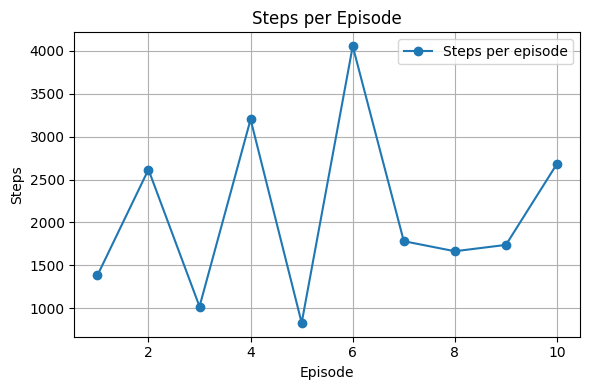

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


# Environment and physics parameters
min_position = -1.5
max_position = 1.8
goal_position_hill = math.pi / 6
force = 0.001
gravity = 0.0025
max_speed = 0.07
start_position = -math.pi / 6

min_gradient = gradient = np.cos(3 * max_position)
max_gradient = gradient = np.cos(3 * min_position)

hill_position = np.cos(3 * goal_position_hill)

# Simulation parameters
num_steps = 20000
episodes = 10
gradient_bins = 60
action_space = [-1, 1]

# Q learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 0.04
epsilon_decay = 0.995
epsilon_min = 0.002

run = 0

#Bins for discretising the continous space
gradient_bin_edges = np.linspace(min_gradient, max_gradient, gradient_bins)

# Q table initialisation
Q = np.zeros((len(gradient_bin_edges), len(action_space))) 

#data collection for debugging 
data = []
steps_per_episode = []

def run_ep(episode_num, epsilon):
    steps_in_episode = 0
    xplore_no = 0
    exp_no = 0
    data_episode = []

    position = start_position
    velocity = 0.0
    done = False

    while not done:
        
         #discretise the position state but with gradient as the agent is unaware of it
        gradient = np.cos(3 * position)
        state_g = np.digitize(gradient, gradient_bin_edges) -1
        
         #choosing an action, explore of exploit
        if np.random.rand() < epsilon:
            action_index = np.random.choice(len(action_space))  #exploring
            xplore_no += 1
        else:
            action_index = np.argmax(Q[state_g])   #exploiting
            exp_no += 1

        action = action_space[action_index]

         #Physics stuff to  move the car
        applied_force = action * force
        velocity += applied_force - (gravity * gradient)
        velocity = np.clip(velocity, -0.07, 0.07)

        position += velocity
        position = np.clip(position, min_position, max_position)

        gradient = np.cos(3 * position)

      #the reward logic 
        reward = 10.0 if abs(position - goal_position_hill) < 0.01 else -0.01
        if position <= min_position:
            reward = -5.0
     #some more reward so that the agent would behave, increased it because now it is gradient
        if action > 0:
            reward += 0.0015

         #recording data
        data.append({
            "Run": run + 1,
            "Episode": episode_num + 1,
            "Step": steps_in_episode + 1,
            "Position": position,
            "Velocity": velocity,
            "Action": action,
            "Reward": reward,
            "Q value": Q[state_g, action_index]
        })

         #get the new state 
        new_state_g = np.digitize(gradient, gradient_bin_edges) - 1

       #update Q learning
        best_future_q = np.max(Q[new_state_g])  # Position-only state
        Q[state_g, action_index] += alpha * (reward + gamma * best_future_q - Q[state_g, action_index])

        steps_in_episode += 1

        #Termination conditions
        if abs(position - goal_position_hill) < 0.01:
            outcome = "Success"
            done = True
        elif position <= min_position:
            outcome = "Failure"
            done = True
        elif steps_in_episode == num_steps:
            outcome = "Max steps taken"
            done = True

    print(f"Episode {episode_num + 1}: {outcome} - Steps: {steps_in_episode} - Explore: {xplore_no} - Exploit: {exp_no}")
    return data_episode, steps_in_episode
    
#run the episodes
for episode in range(episodes):
    episode_data, steps = run_ep(episode, epsilon)
    data.extend(episode_data)
    steps_per_episode.append(steps)
    epsilon = max(epsilon * epsilon_decay, epsilon_min)  # exponential decay
    
# Convert data to DataFrame
df = pd.DataFrame(data)
print(df)

# Plot steps per episode
plt.figure(figsize=(6, 4))
plt.plot(range(1, episodes + 1), steps_per_episode, marker="o", label="Steps per episode")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Success in run 1: 6, steps: 22444
Success in run 2: 6, steps: 21151
Success in run 3: 5, steps: 55370
Success in run 4: 8, steps: 20999
Success in run 5: 7, steps: 34544
Success in run 6: 7, steps: 33458
Success in run 7: 3, steps: 27271
Success in run 8: 6, steps: 56388
Success in run 9: 5, steps: 26404
Success in run 10: 4, steps: 25392
Total success:  57
Average step run:  32342.1
[1453.9 4080.6 1513.3 2771.9 2074.5 2043.5 4074.7 4066.7 4156.9 6106.1]


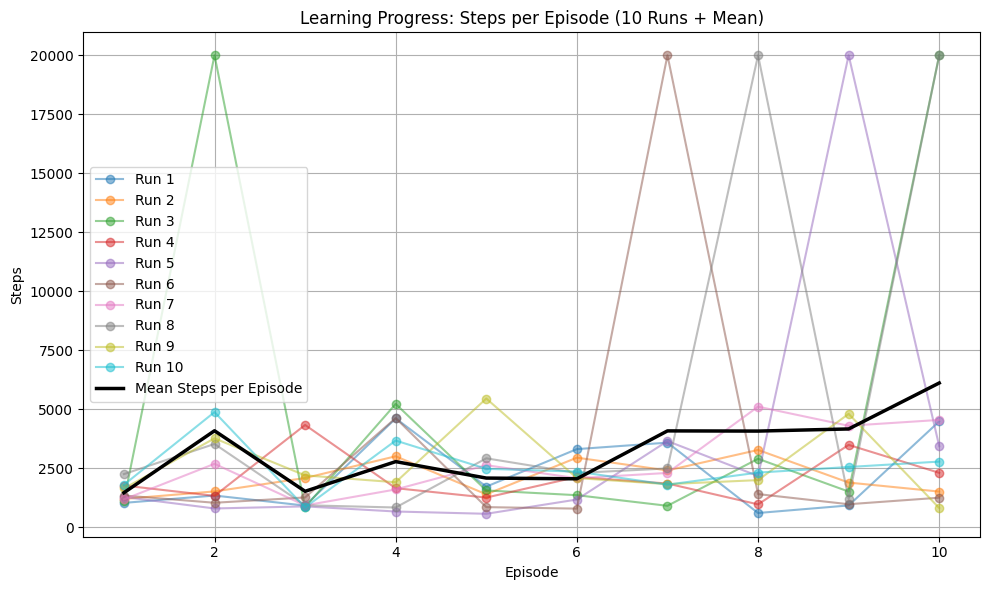

        Run  Episode  Step  Position  Velocity  Action   Reward   Q value
0         1        1     1 -0.524599 -0.001000      -1  -0.0100  0.000000
1         1        1     2 -0.524591  0.000007       1  -0.0085  0.000000
2         1        1     3 -0.523576  0.001015       1  -0.0085 -0.000850
3         1        1     4 -0.523562  0.000015      -1  -0.0100 -0.001000
4         1        1     5 -0.522547  0.001014       1  -0.0085 -0.001699
...     ...      ...   ...       ...       ...     ...      ...       ...
323416   10       10  2769  0.431220  0.024455       1  -0.0085 -0.083360
323417   10       10  2770  0.455991  0.024771       1  -0.0085 -0.074891
323418   10       10  2771  0.481258  0.025267       1  -0.0085 -0.064870
323419   10       10  2772  0.507209  0.025950       1  -0.0085 -0.055225
323420   10       10  2773  0.532036  0.024828      -1  10.0000 -0.051758

[323421 rows x 8 columns]


In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


# Environment and physics parameters
min_position = -1.5
max_position = 1.8
goal_position_hill = math.pi / 6
force = 0.001
gravity = 0.0025
max_speed = 0.07
start_position = -math.pi / 6

min_gradient = gradient = np.cos(3 * max_position)
max_gradient = gradient = np.cos(3 * min_position)

hill_position = np.cos(3 * goal_position_hill)

# Simulation parameters
num_steps = 20000
episodes = 10
gradient_bins = 60
action_space = [-1, 1]

# Q learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 0.04
epsilon_decay = 0.995
epsilon_min = 0.002

run = 0

#Bins for discretising the continous space
gradient_bin_edges = np.linspace(min_gradient, max_gradient, gradient_bins)

# Q table initialisation
Q = np.zeros((len(gradient_bin_edges), len(action_space))) 

#data collection for debugging 
data = []
steps_per_episode = []

def run_ep(episode_num, epsilon):
    steps_in_episode = 0
    xplore_no = 0
    exp_no = 0
    data_episode = []
    success = 0

    position = start_position
    velocity = 0.0
    done = False

    while not done:
        
         #discretise the position state but with gradient as the agent is unaware of it,  one dimensional binning
        gradient = np.cos(3 * position)
        state_g = np.digitize(gradient, gradient_bin_edges) -1
        
         #choosing an action, explore of exploit
        if np.random.rand() < epsilon:
            action_index = np.random.choice(len(action_space))  #exploring
            xplore_no += 1
        else:
            action_index = np.argmax(Q[state_g])   #exploiting
            exp_no += 1

        action = action_space[action_index]

         #Physics stuff to  move the car
        applied_force = action * force
        velocity += applied_force - (gravity * gradient)
        velocity = np.clip(velocity, -0.07, 0.07)

        position += velocity
        position = np.clip(position, min_position, max_position)
      #update gradient
        gradient = np.cos(3 * position)

      #the reward logic 
        reward = 10.0 if abs(position - goal_position_hill) < 0.01 else -0.01
        if position <= min_position:
            reward = -5.0
     #some more reward so that the agent would behave, increased it because now it is gradient
        if action > 0:
            reward += 0.0015

         #recording data
        data.append({
            "Run": run + 1,
            "Episode": episode_num + 1,
            "Step": steps_in_episode + 1,
            "Position": position,
            "Velocity": velocity,
            "Action": action,
            "Reward": reward,
            "Q value": Q[state_g, action_index]
        })

         #get the new state 
        new_state_g = np.digitize(gradient, gradient_bin_edges) - 1

       #update Q learning
        best_future_q = np.max(Q[new_state_g])  # Position-only state
        Q[state_g, action_index] += alpha * (reward + gamma * best_future_q - Q[state_g, action_index])

        steps_in_episode += 1

        #Termination conditions
        if abs(position - goal_position_hill) < 0.01:
            outcome = "Success"
            success += 1
            done = True
        elif position <= min_position:
            outcome = "Failure"
            done = True
        elif steps_in_episode == num_steps:
            outcome = "Max steps taken"
            done = True
            
    #Uncomment this to see the runs in more detail
    #print(f'Run {run + 1} Episode {episode_num + 1}: {outcome} - Steps: {steps_in_episode} - Explore: {xplore_no} - Exploit: {exp_no}')
    return steps_in_episode, success

#Data for plotting for all 10 runs with 10 episodes
steps_per_run = []
total_success = 0
total_run_steps = 0  #to calculate total steps from all runs
for run in range(10): 
    Q = np.zeros((len(gradient_bin_edges), len(action_space)))  #resetting the Q table for each run
    steps_per_episode = []
    success_per_ep = 0 # successful outcomes per episode
    success_per_run =0  # successful outcomes per run, its data will be used for finding the sum of overall successful outcomes to measure performance
    epsilon = 0.04 # resetting epsilon for each run
    steps_one_run = 0  #collects steps for one run, its data will be used for calculating the average of all runs
    
    for episode in range(episodes):         
        steps, success_no = run_ep(episode, epsilon)        
        steps_per_episode.append(steps)
        success_per_ep += success_no
        steps_one_run += steps
        epsilon = max(epsilon * epsilon_decay, epsilon_min)   #exponential decay per episode

    steps_per_run.append(steps_per_episode)
    success_per_run += success_per_ep #successful outcomes per run
    total_success += success_per_run # total successful outcomes 
    total_run_steps += steps_one_run #total steps from all runs
    print(f"Success in run {run + 1}: {success_per_run}, steps: {steps_one_run}")  #shows all successful outcomes in each run along with steps for each run

average_steps_per_run = total_run_steps / 10  # average steps per run to check performance

#printing data for performance
print("Total success: ", total_success) #shows the sum of all successful outcomes of all 10 runs
print("Average step run: ", average_steps_per_run)


#Calculate the mean steps per episode across all runs
mean_steps = np.mean(steps_per_run, axis=0)
print(mean_steps)


#Plotting all 10 runs and 10 episodes
plt.figure(figsize=(10, 6))
for run_idx, steps in enumerate(steps_per_run):
    plt.plot(range(1, episodes + 1), steps, marker='o', label=f"Run {run_idx + 1}", alpha=0.5)

plt.plot(range(1, episodes + 1), mean_steps, color='black', linewidth=2.5, label="Mean Steps per Episode")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per episode for all 10 runs with mean")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#printing the dataframe
df = pd.DataFrame(data)
print(df)

